# KNN (k-nearest neighbors)

## Подключение библиотек

In [132]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 1. Данные

### Разделение данных на тренировочные и тестовые

In [133]:
features_train = []
prices = []

with open('./dataset/preprocessed_train.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    feature_titles = [key for key in reader.fieldnames if key != 'Survived']
    
    for row in reader:
        sale_price = float(row['Survived'])
        feature_values = []
        for feature in feature_titles:
            value = row[feature]
            feature_values.append(float(value))
        
        features_train.append(feature_values)
        prices.append(sale_price)

features_train = np.array(features_train)
prices = np.array(prices)

x_train, x_test, y_train, y_test = train_test_split(
    features_train, prices, 
    test_size=0.3, 
    random_state=42
)

numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()

for i, feature in enumerate(feature_titles):
    if feature in numerical_features:
        mean_value = np.nanmean(x_train[:, i])
        x_train[:, i] = np.where(np.isnan(x_train[:, i]), mean_value, x_train[:, i])
        x_test[:, i] = np.where(np.isnan(x_test[:, i]), mean_value, x_test[:, i])
        
        x_train[:, i] = scaler.fit_transform(x_train[:, i].reshape(-1, 1)).flatten()
        x_test[:, i] = scaler.transform(x_test[:, i].reshape(-1, 1)).flatten()

### Визуализация данных

In [134]:
table_data = []
headers = ["Index"] + feature_titles + ["Survived"]

for i, (feat_scaled, price) in enumerate(zip(x_train, y_train)):
    row = [i] + list(feat_scaled) + [price]
    table_data.append(row)

print(tabulate(table_data[:20], headers=headers, tablefmt="grid", numalign="left"))

+---------+----------+-------+-----------+-----------+-----------+------------+------------+------------+
| Index   | Pclass   | Sex   | Age       | SibSp     | Parch     | Fare       | Embarked   | Survived   |
+=========+==========+=======+===========+===========+===========+============+============+============+
| 0       | 1        | 0     | -1.85798  | -0.474161 | 1.99885   | 0.980998   | 2          | 1          |
+---------+----------+-------+-----------+-----------+-----------+------------+------------+------------+
| 1       | 3        | 0     | -0.278303 | -0.474161 | -0.479327 | -0.469634  | 2          | 0          |
+---------+----------+-------+-----------+-----------+-----------+------------+------------+------------+
| 2       | 3        | 1     | -2.08365  | 0.348687  | 0.759763  | -0.406136  | 2          | 1          |
+---------+----------+-------+-----------+-----------+-----------+------------+------------+------------+
| 3       | 2        | 0     | 0.549149  | 0.3

## 2. Построение модели

In [135]:
class KNN:
    def __init__(self, k=3, X_train=None, y_train=None):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X):
        if self.X_train is None or self.y_train is None:
            raise ValueError("X_train and y_train must be set before prediction.")
        if self.k > self.X_train.shape[0]:
            print(f"Warning: k ({self.k}) is greater than the number of training samples ({self.X_train.shape[0]})")
            print(f"Setting k to the number of training samples (k = {self.X_train.shape[0]})")

        predictions = []
        for sample in X: 
            distances = [(
                np.sqrt(np.sum((sample - train_sample) ** 2)),  
                idx
            ) for idx, train_sample in enumerate(self.X_train)]
            
            k_nearest = sorted(distances, key=lambda x: x[0])[:self.k]
            k_labels = [self.y_train[idx] for _, idx in k_nearest]
            most_common = max(set(k_labels), key=k_labels.count)
            predictions.append(most_common)
        return np.array(predictions)
    
    def score(self, X, y):
        preds = self.predict(X)
        return np.mean(preds == y)

## 3. Тестирование модели

Сравниваем точность при разном значении k (кол-во соседей на основе которых делается предсказание)

Accuracy for k = 1: 74.63%
Accuracy for k = 2: 74.63%
Accuracy for k = 3: 77.61%
Accuracy for k = 4: 76.49%
Accuracy for k = 5: 76.12%
Accuracy for k = 6: 76.87%
Accuracy for k = 7: 77.61%
Accuracy for k = 8: 78.36%
Accuracy for k = 9: 77.24%
Accuracy for k = 10: 78.73%
Accuracy for k = 11: 78.36%
Accuracy for k = 12: 79.10%
Accuracy for k = 13: 78.73%
Accuracy for k = 14: 79.48%
Accuracy for k = 15: 78.73%
Accuracy for k = 16: 79.10%
Accuracy for k = 17: 79.10%
Accuracy for k = 18: 79.10%
Accuracy for k = 19: 79.10%
Accuracy for k = 20: 79.10%
Accuracy for k = 21: 79.48%
Accuracy for k = 22: 78.73%
Accuracy for k = 23: 78.73%
Accuracy for k = 24: 78.73%
Accuracy for k = 25: 78.73%
Accuracy for k = 26: 79.10%
Accuracy for k = 27: 79.48%
Accuracy for k = 28: 80.60%
Accuracy for k = 29: 80.60%
Accuracy for k = 30: 79.85%
Accuracy for k = 31: 79.85%
Accuracy for k = 32: 80.22%
Accuracy for k = 33: 79.85%
Accuracy for k = 34: 79.48%
Accuracy for k = 35: 78.73%
Accuracy for k = 36: 79.10%
A

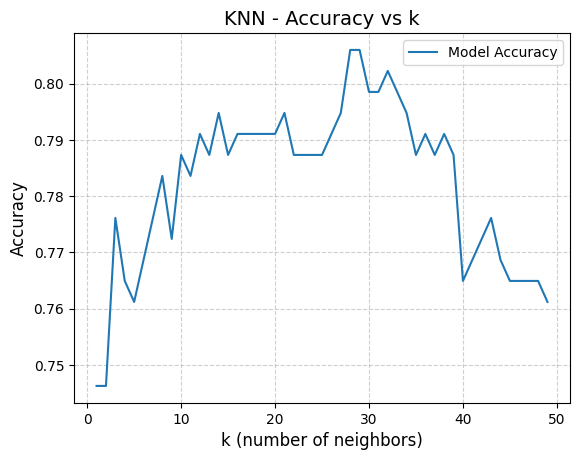

In [136]:
scores_k = []
n = 50

for i in range(1, n):
    model = KNN(k=i, X_train=x_train, y_train=y_train)
    score = model.score(x_test, y_test)
    scores_k.append(score)
    print(f"Accuracy for k = {i}: {score * 100:.2f}%")

plt.plot(range(1, n), scores_k, label="Model Accuracy")
plt.title("KNN - Accuracy vs k", fontsize=14)
plt.xlabel("k (number of neighbors)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc="best")
plt.show()

### Выводим лучшее значение k

In [137]:
best_k = scores_k.index(max(scores_k)) + 1
print(f"Best k: {best_k}")

Best k: 28
